In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
data = pd.read_csv("../data/StudentPerformanceFactors.csv")
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [27]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = imputer.fit_transform(data)
data_imputed = pd.DataFrame(data=data_imputed)
data_imputed.columns = data.columns
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   object
 1   Attendance                  6607 non-null   object
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   object
 6   Previous_Scores             6607 non-null   object
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   object
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6607 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [30]:
data.select_dtypes(include=['int64', 'float']).columns

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')

In [31]:
data_imputed['Hours_Studied'] = data_imputed['Hours_Studied'].astype('int64')
data_imputed['Attendance'] = data_imputed['Attendance'].astype('int64')
data_imputed['Sleep_Hours'] = data_imputed['Sleep_Hours'].astype('int64')
data_imputed['Previous_Scores'] = data_imputed['Previous_Scores'].astype('int64')
data_imputed['Tutoring_Sessions'] = data_imputed['Tutoring_Sessions'].astype('int64')
data_imputed['Physical_Activity'] = data_imputed['Physical_Activity'].astype('int64')
data_imputed['Exam_Score'] = data_imputed['Exam_Score'].astype('int64')
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6607 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [32]:
data_imputed.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


<Axes: ylabel='Hours_Studied'>

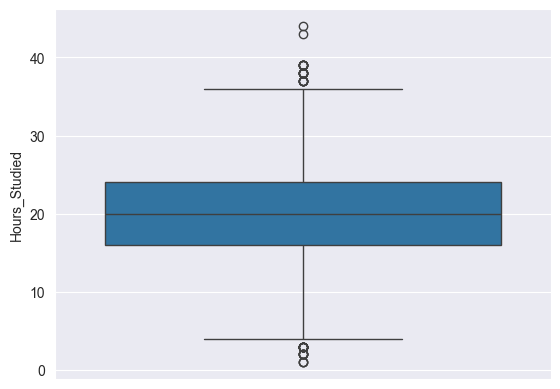

In [33]:
sns.boxplot(data_imputed['Hours_Studied'])

In [34]:
def remove_outliers(handle_data, column_name):
    Q1 = np.percentile(handle_data[column_name], 25, method='midpoint')
    Q3 = np.percentile(handle_data[column_name], 75, method='midpoint')
    IQR = Q3 - Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    uppers = np.where(handle_data[column_name]>=upper)[0]
    lowers = np.where(handle_data[column_name]<=lower)[0]
    handle_data.drop(index=uppers, inplace=True, errors='ignore')
    handle_data.drop(index=lowers, inplace=True, errors='ignore')
    return handle_data
print(data_imputed.shape)

(6607, 20)


In [35]:
data_imputed = (remove_outliers(data_imputed, 'Hours_Studied').pipe(remove_outliers, 'Attendance').pipe(remove_outliers, 'Sleep_Hours').pipe(remove_outliers, 'Previous_Scores').pipe(remove_outliers, 'Tutoring_Sessions').pipe(remove_outliers, 'Physical_Activity').pipe(remove_outliers, 'Exam_Score'))
data_imputed.shape

(5967, 20)

In [36]:
data_imputed['Parental_Involvement'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [37]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
one_hot = OneHotEncoder()
ord_columns = ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Family_Income', 'Teacher_Quality']
for column in ord_columns:
    data_imputed[column] = le.fit_transform(data_imputed[column])
data_imputed.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,No,7,73,1,Yes,0,1,2,Public,Positive,3,No,High School,Near,Male,67
1,19,64,1,2,No,8,59,1,Yes,2,2,2,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,2,2,Yes,7,91,2,Yes,2,2,2,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,1,2,Yes,8,98,2,Yes,1,2,2,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,2,2,Yes,6,65,2,Yes,3,2,0,Public,Neutral,4,No,College,Near,Female,70


In [38]:
data_imputed = pd.get_dummies(data_imputed, columns=['Extracurricular_Activities', 'Internet_Access', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender'])

In [39]:
data_imputed.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,...,Learning_Disabilities_No,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Female,Gender_Male
0,23,84,1,0,7,73,1,0,1,2,...,True,False,False,True,False,False,False,True,False,True
1,19,64,1,2,8,59,1,2,2,2,...,True,False,True,False,False,False,True,False,True,False
2,24,98,2,2,7,91,2,2,2,2,...,True,False,False,False,True,False,False,True,False,True
3,29,89,1,2,8,98,2,1,2,2,...,True,False,False,True,False,False,True,False,False,True
4,19,92,2,2,6,65,2,3,2,0,...,True,False,True,False,False,False,False,True,True,False


In [40]:
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5967 entries, 0 to 6606
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Hours_Studied                          5967 non-null   int64
 1   Attendance                             5967 non-null   int64
 2   Parental_Involvement                   5967 non-null   int32
 3   Access_to_Resources                    5967 non-null   int32
 4   Sleep_Hours                            5967 non-null   int64
 5   Previous_Scores                        5967 non-null   int64
 6   Motivation_Level                       5967 non-null   int32
 7   Tutoring_Sessions                      5967 non-null   int64
 8   Family_Income                          5967 non-null   int32
 9   Teacher_Quality                        5967 non-null   int32
 10  Physical_Activity                      5967 non-null   int64
 11  Exam_Score                         

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y = data_imputed['Exam_Score']
data_imputed = data_imputed.drop(columns=['Exam_Score'])
data_imputed[data_imputed.columns] = scaler.fit_transform(data_imputed[data_imputed.columns])
data_imputed = pd.concat([data_imputed, y], axis=1)

In [42]:
data_imputed.to_csv("../data/StudentPerformanceFactorsCleaned.csv", index=False)

In [43]:
data_imputed.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Sleep_Hours', 'Previous_Scores',
       'Motivation_Level', 'Tutoring_Sessions', 'Family_Income',
       'Teacher_Quality', 'Physical_Activity', 'Extracurricular_Activities_No',
       'Extracurricular_Activities_Yes', 'Internet_Access_No',
       'Internet_Access_Yes', 'School_Type_Private', 'School_Type_Public',
       'Peer_Influence_Negative', 'Peer_Influence_Neutral',
       'Peer_Influence_Positive', 'Learning_Disabilities_No',
       'Learning_Disabilities_Yes', 'Parental_Education_Level_College',
       'Parental_Education_Level_High School',
       'Parental_Education_Level_Postgraduate', 'Distance_from_Home_Far',
       'Distance_from_Home_Moderate', 'Distance_from_Home_Near',
       'Gender_Female', 'Gender_Male', 'Exam_Score'],
      dtype='object')